##  Гипотеза

Образование в мире распределено следующим образом: Америка, Китай, Страны Европы + Канада, Япония, СНГ, Африка. Со временем образование растёт в качестве

## Анализ

Выделим топ-10 стран по среднему качеству образования и по кол-ву университетов

In [10]:
import plotly
import matplotlib.pyplot as plt
import pandas as pd

<BarContainer object of 20 artists>

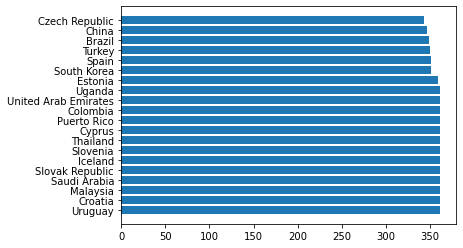

In [95]:
edu = pd.read_csv("cwurData.csv")
edu_df = edu[['world_rank', 'country', 'quality_of_education', 'patents', 'year']]
grouped = edu_df.groupby(['country']).mean().sort_values(by='quality_of_education', ascending=False)
grouped['country'] = grouped.index
edu_plot = grouped.head(20)
plt.barh(edu_plot['country'], edu_plot['quality_of_education'])

<BarContainer object of 20 artists>

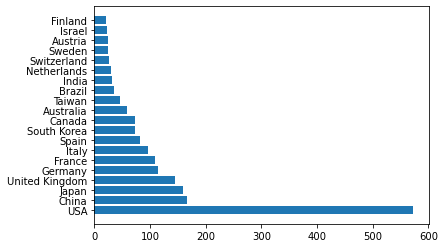

In [96]:
grouped = edu_df.groupby(['country']).count().sort_values(by='quality_of_education', ascending=False)
grouped['country'] = grouped.index
edu_plot = grouped.head(20)
plt.barh(edu_plot['country'], edu_plot['quality_of_education'])

Выделим страны, в которой страны имеют максимальное и минимальное качество образования

In [98]:
edu_df.sort_values(by='quality_of_education', ascending=True).head(1)

,world_rank,country,quality_of_education,patents,year
20,21,USA,1,101,2012


In [99]:
edu_df.sort_values(by='quality_of_education', ascending=False).head(1)

,world_rank,country,quality_of_education,patents,year
2199,1000,China,367,547,2015


## Выводы
Как ни странно, если смотреть по среднему качеству образования в университетах, то выигрывает Уругвай. При том институт с самым низким качеством образования находится в США, что естественно, так как эта страна также первая по кол-ву университетов и из-за этого вероятность нахождения университета с самым низким качеством образования там высока.